In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report



# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Reading the Dataset

In [6]:
df = pd.read_csv("heart_disease2.csv")
df.shape # (rows, columns)

(4117, 13)

In [7]:
df.head()

,Gender,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Heartstroke
0,0,32,1,0,0,0,0,242,111.0,70.0,29.84,80,0
1,0,33,1,0,0,0,0,199,116.0,81.0,21.61,75,0
2,0,33,0,0,0,0,0,158,108.0,67.0,19.84,86,0
3,1,33,0,0,0,1,0,165,141.5,95.0,26.74,54,0
4,0,33,1,0,0,0,0,200,119.0,74.0,23.80,75,0


In [8]:
df.tail()

,Gender,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Heartstroke
4112,0,69,0,1,0,1,0,203,166.0,90.0,25.40,77,0
4113,1,69,1,0,0,0,0,245,123.0,77.0,26.58,70,1
4114,1,69,1,0,0,1,0,186,179.0,93.0,26.64,72,0
4115,0,69,0,1,0,1,0,220,143.0,81.0,26.27,60,0
4116,0,70,0,1,0,1,0,231,136.0,84.0,31.78,60,0


In [9]:
df["Heartstroke"].value_counts()

Heartstroke
0    3504
1     613
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4117 non-null   int64  
 1   age              4117 non-null   int64  
 2   currentSmoker    4117 non-null   int64  
 3   BPMeds           4117 non-null   int64  
 4   prevalentStroke  4117 non-null   int64  
 5   prevalentHyp     4117 non-null   int64  
 6   diabetes         4117 non-null   int64  
 7   totChol          4117 non-null   int64  
 8   sysBP            4117 non-null   float64
 9   diaBP            4117 non-null   float64
 10  BMI              4117 non-null   float64
 11  heartRate        4117 non-null   int64  
 12  Heartstroke      4117 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 418.3 KB


# Summary of the Dataset

In [11]:
df.describe()

,Gender,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Heartstroke
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,0.435026,49.503279,0.493806,0.029147,0.005344,0.308720,0.025261,236.733301,132.226378,82.894826,25.799240,75.850134,0.148895
std,0.495821,8.530788,0.500022,0.168240,0.072914,0.462021,0.156936,44.492138,21.899785,11.850645,4.075371,12.071706,0.356028
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,0.000000
75%,1.000000,56.000000,1.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,28.040000,83.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,1.000000


# Compare target column with sex column

In [12]:

pd.crosstab(df.Heartstroke, df.Gender)

Gender,0,1
Heartstroke,,
0,2049,1455
1,277,336


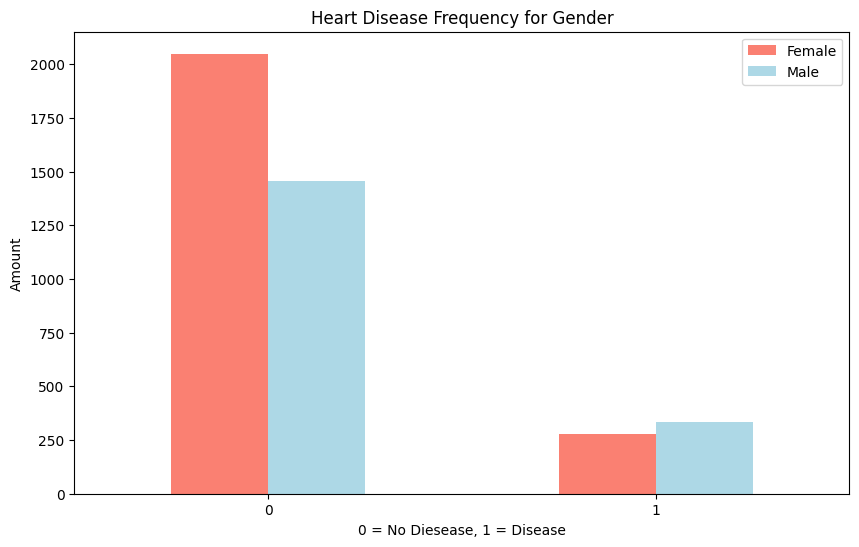

In [13]:
# Create a plot of crosstab
pd.crosstab(df.Heartstroke, df.Gender).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

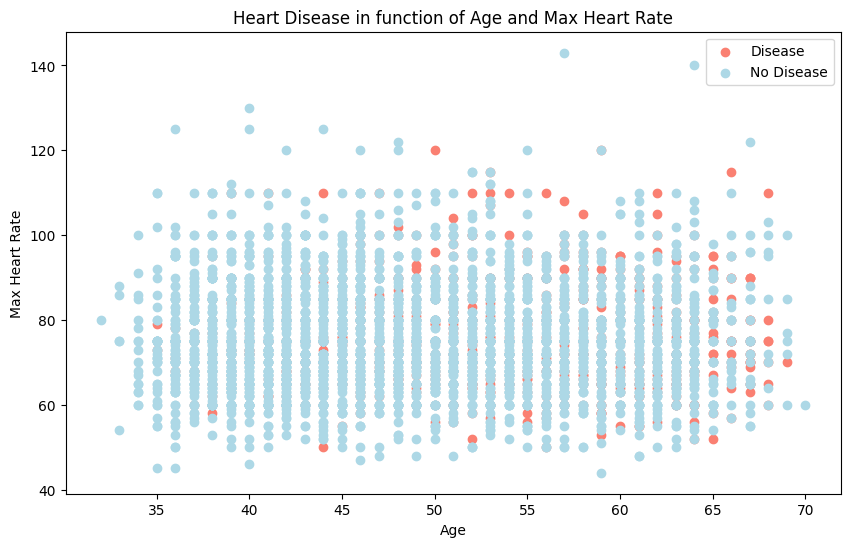

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.Heartstroke==1],
            df.heartRate[df.Heartstroke==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.Heartstroke==0],
            df.heartRate[df.Heartstroke==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Checking Risk w.r.t Age

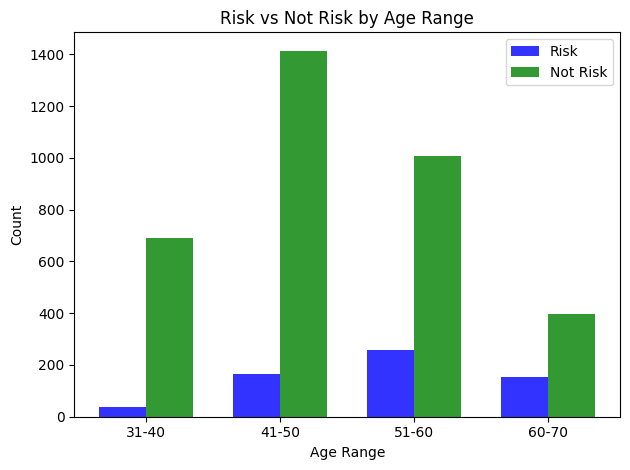

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('heart_disease2.csv')

# Define the age range intervals
age_ranges = [(31, 40), (41, 50), (51, 60), (60, 70)]

# Initialize dictionaries to store the counts for 'Risk' and 'Not Risk' in each age range
risk_counts = {range: 0 for range in age_ranges}
not_risk_counts = {range: 0 for range in age_ranges}

# Iterate over each row in the dataset and assign counts to the corresponding age range and attribute
for _, row in df.iterrows():
    age = row['age']
    Hstroke = row['Heartstroke']
    for range in age_ranges:
        if range[0] <= age <= range[1]:
            if Hstroke == 1:
                risk_counts[range] += 1
            else:
                not_risk_counts[range] += 1
            break

# Extract the counts for 'Risk' and 'Not Risk' for plotting
risk_values = list(risk_counts.values())
not_risk_values = list(not_risk_counts.values())

# Extract the lower bound of each age range for plotting
age_labels = [f'{range[0]}-{range[1]}' for range in age_ranges]

# Set up the bar plot
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots()
index = np.arange(len(age_ranges))

# Plot the bars for 'Risk'
rects1 = ax.bar(index, risk_values, bar_width, alpha=opacity, color='b', label='Risk')

# Plot the bars for 'Not Risk'
rects2 = ax.bar(index + bar_width, not_risk_values, bar_width, alpha=opacity, color='g', label='Not Risk')

# Add labels, title, and legend
ax.set_xlabel('Age Range')
ax.set_ylabel('Count')
ax.set_title('Risk vs Not Risk by Age Range')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(age_labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Correlation matrix

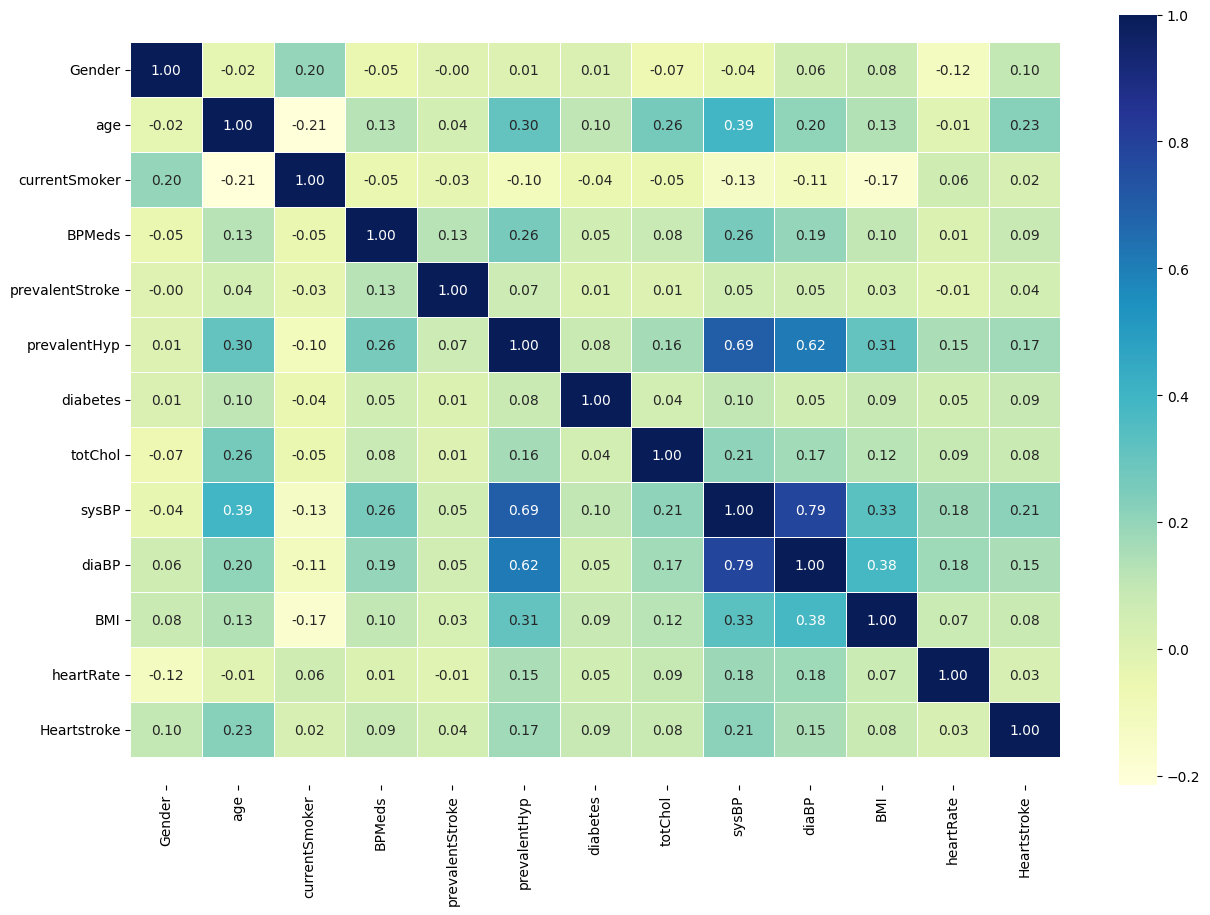

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Split data into X and y For Training and Testing

In [17]:
X = df.drop("Heartstroke", axis=1)
y = df["Heartstroke"]

# Over Sampling

In [18]:
from imblearn.over_sampling import RandomOverSampler


ROS = RandomOverSampler()
X, y = ROS.fit_resample(X, y)


In [33]:
# Convert X and y to pandas DataFrames/Series if they are numpy arrays
X_df = pd.DataFrame(X)
y_series = pd.Series(y)

# Concatenate X and y into a single DataFrame
oversampled_data = pd.concat([X_df, y_series], axis=1)

# Define the path where you want to save the CSV file
csv_file_path = "oversampled_data.csv"

# Save the DataFrame to a CSV file
oversampled_data.to_csv(csv_file_path, index=False)

print("Oversampled data saved to", csv_file_path)


Oversampled data saved to oversampled_data.csv


# Analysis after over sampling

In [32]:
df1 = pd.read_csv("oversampled_data.csv")
df1.shape # (rows, columns)
df1["Heartstroke"].value_counts()

Heartstroke
0    3504
1    3504
Name: count, dtype: int64

In [15]:
len(X)

7008

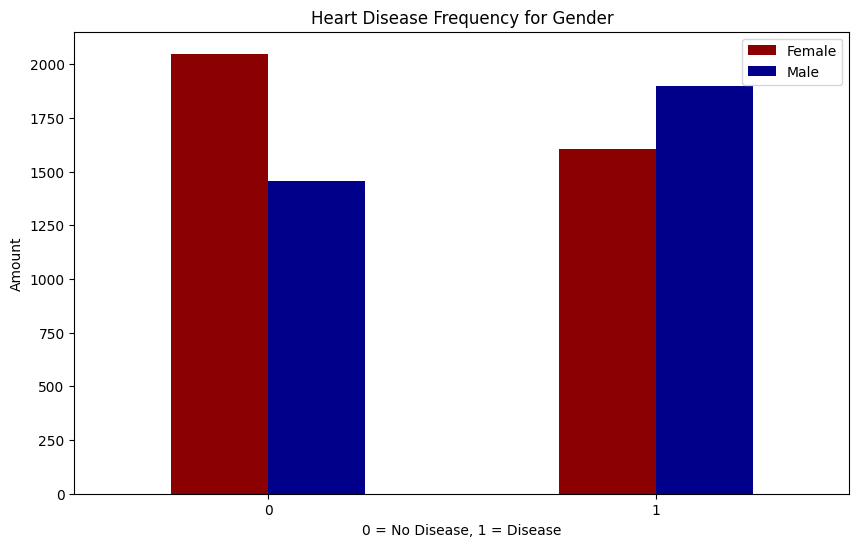

In [36]:
#import matplotlib.pyplot as plt
#import pandas as pd

# Assuming df is your DataFrame containing 'Heartstroke' and 'Gender' columns

# Replace these with your actual DataFrame column names if they are different
heartstroke_column = 'Heartstroke'
gender_column = 'Gender'

# Assuming df is your DataFrame containing 'Heartstroke' and 'Gender' columns
pd.crosstab(df1[heartstroke_column], df1[gender_column]).plot(kind="bar", figsize=(10, 6), color=["darkred", "darkblue"])

plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()


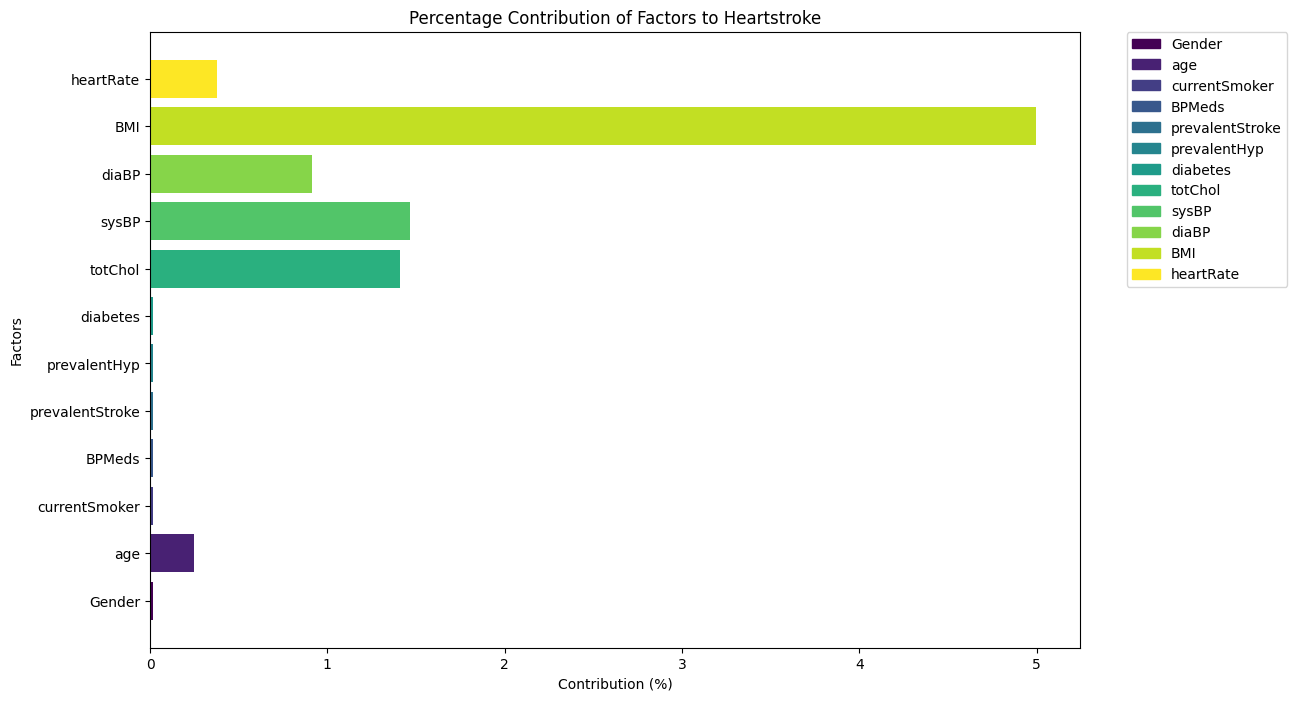

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define the columns you want to analyze the dependency on
columns = ['Gender', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']

# Calculate the percentage distribution of 'Heartstroke' for each category in each column
dependency_percentage = {}
total_samples = len(df1)
for column in columns:
    column_percentage = df1.groupby(column)['Heartstroke'].value_counts(normalize=True).unstack(fill_value=0) * 100
    dependency_percentage[column] = column_percentage.loc[:, 1].sum() / total_samples  # Summing up the percentage contribution of 'Heartstroke' = 1

# Plotting the pie chart with color scale
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(dependency_percentage)))  # Choose a colormap

# Plotting pie chart
patches = []
for i, (factor, percentage) in enumerate(dependency_percentage.items()):
    patches.append(mpatches.Patch(color=colors[i], label=factor))
    plt.barh(factor, percentage, color=colors[i])

plt.title('Percentage Contribution of Factors to Heartstroke')
plt.xlabel('Contribution (%)')
plt.ylabel('Factors')

# Adding a color scale legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


Feature Importance:
            Feature  Importance
1               age    0.179232
8             sysBP    0.169477
10              BMI    0.152935
7           totChol    0.149352
9             diaBP    0.137276
11        heartRate    0.123524
0            Gender    0.024501
5      prevalentHyp    0.024329
2     currentSmoker    0.023408
6          diabetes    0.008292
3            BPMeds    0.005894
4   prevalentStroke    0.001780

Correlation with Target:
Heartstroke        1.000000
age                0.321711
sysBP              0.267121
prevalentHyp       0.233015
diaBP              0.189977
Gender             0.126829
BMI                0.105652
BPMeds             0.098377
totChol            0.096014
diabetes           0.095353
prevalentStroke    0.062263
heartRate          0.042549
currentSmoker      0.028539
Name: Heartstroke, dtype: float64


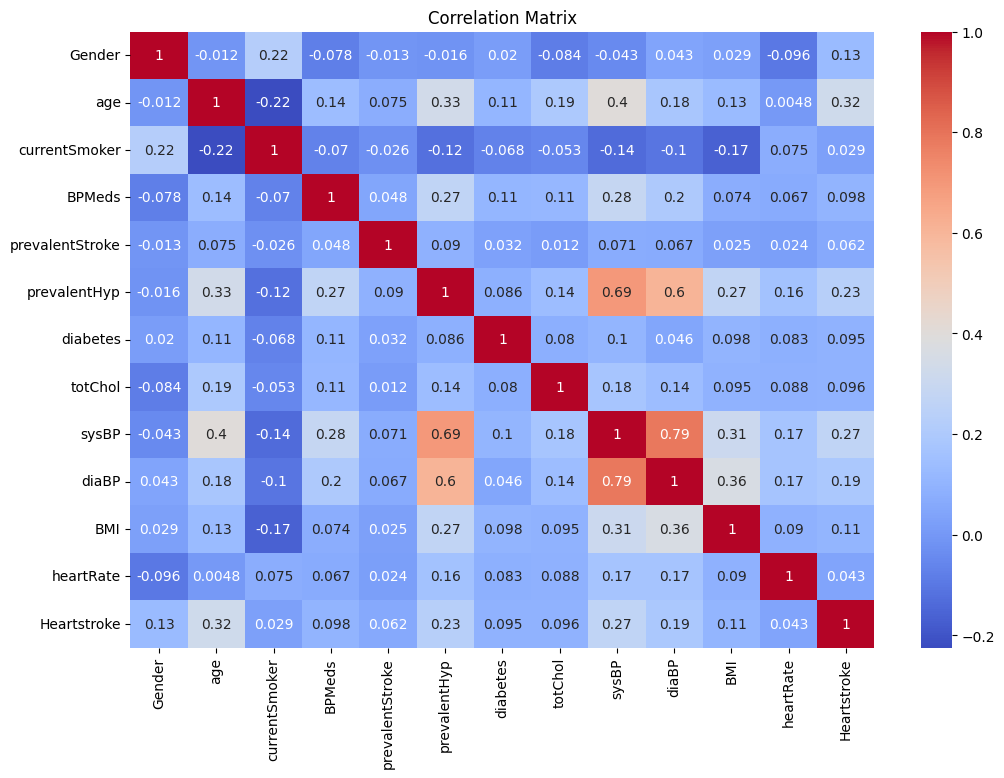

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1 is your DataFrame containing the features and the target variable 'Heartstroke'
# Extract features and target variable
X = df1.drop('Heartstroke', axis=1)
y = df1['Heartstroke']

# 1. Feature Importance
model = RandomForestClassifier()  # You can use any tree-based model
model.fit(X, y)
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# 2. Correlation Analysis
correlation_matrix = df1.corr()
correlation_with_target = correlation_matrix['Heartstroke'].abs().sort_values(ascending=False)
print("\nCorrelation with Target:")
print(correlation_with_target)

# 3. Domain Knowledge
# Review each feature based on domain knowledge and consider removing or combining irrelevant or redundant features

# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [50]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [51]:
X_train, len(X_train)

(      Gender  age  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
 1741       0   47              1       0                0             0   
 3105       0   56              0       0                0             1   
 1869       1   48              1       0                0             1   
 4643       0   49              1       0                0             0   
 387        0   39              1       0                0             0   
 ...      ...  ...            ...     ...              ...           ...   
 3772       0   63              0       0                0             0   
 5191       0   51              0       1                0             1   
 5226       1   52              1       0                0             0   
 5390       1   56              1       0                0             1   
 860        0   41              0       0                0             0   
 
       diabetes  totChol  sysBP  diaBP    BMI  heartRate  
 1741         0      155  1

In [52]:
y_train, len(y_train)

(1741    0
 3105    0
 1869    0
 4643    1
 387     0
        ..
 3772    0
 5191    1
 5226    1
 5390    1
 860     0
 Name: Heartstroke, Length: 5606, dtype: int64,
 5606)

# Put models in a dictionary

In [19]:
## Defining & running the Classifier Models

classifiers = {
    "KNN": KNeighborsClassifier(3),
    "SVC": SVC(kernel="rbf", C=0.025, probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "Logistic Regression": LogisticRegression()}

# Logging for Visual Comparison

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

m_scores = {}
for name,clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    train_predictions = clf.predict(X_test)
    m_scores[name] = accuracy_score(y_test, train_predictions)
    print(f"{clf}"+": {:.5%}".format(m_scores[name]))
    
print(f'\033[94m='*30)

KNeighborsClassifier(n_neighbors=3): 85.37803%
SVC(C=0.025, probability=True): 60.27104%
DecisionTreeClassifier(): 92.36805%
RandomForestClassifier(): 97.43224%
GaussianNB(): 60.98431%
LogisticRegression(): 65.40656%


C:\Users\arnav\miniconda3\envs\projectenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Accuracy Bar-Plot

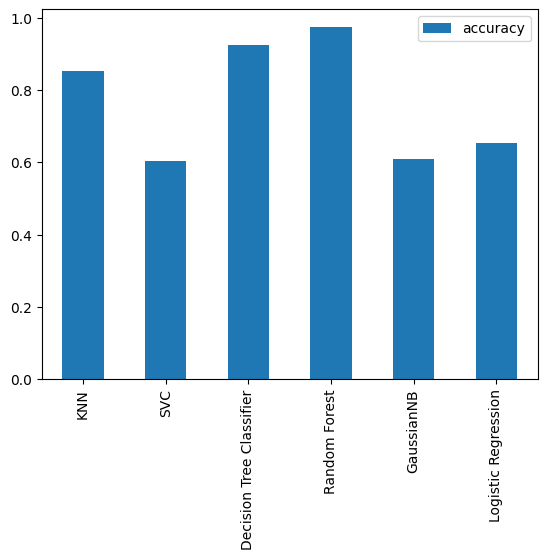

In [20]:
model_compare = pd.DataFrame(m_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [21]:
# Fitting the given dataset in Random Forest 
from sklearn.ensemble import RandomForestClassifier

ensemble = RandomForestClassifier(random_state=3)  # Corrected the variable name

ensemble.fit(X_train, y_train)

y_preds2 = ensemble.predict(X_test)  # Changed `svc.predict` to `ensemble.predict`
y_preds2


from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_preds2)*100
ac1

97.28958630527818

In [22]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier()  # Corrected the variable name

neighbors.fit(X_train, y_train)

y_preds3 = neighbors.predict(X_test)  # Changed `ensemble.predict` to `neighbors.predict`
y_preds3
ac2=accuracy_score(y_test,y_preds3)*100
ac2

78.45934379457917

In [23]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [24]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
y_preds4 = neighbors.predict(X_test)  # Changed `ensemble.predict` to `neighbors.predict`
y_preds4
ac3=accuracy_score(y_test,y_preds4)*100
ac3

Fitting 5 folds for each of 20 candidates, totalling 100 fits


78.45934379457917

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [26]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [56]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9415121255349501

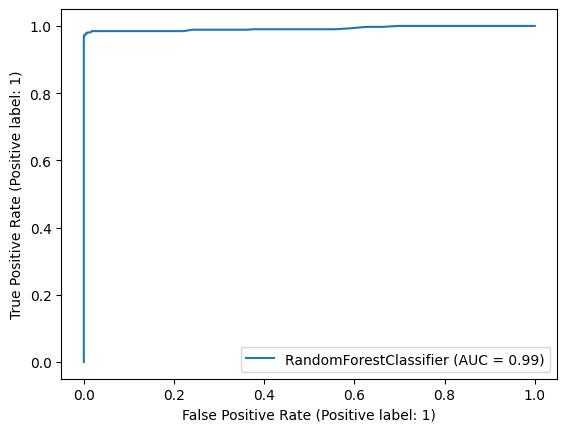

In [57]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(ensemble, X_test, y_test)

# Confusion Matrix
#The visual representation of the Actual VS Predicted values

#Presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes

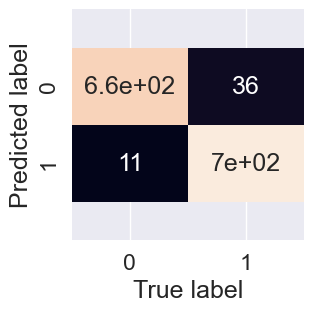

In [58]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds2),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds2)

# Classification Report

In [59]:
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       691
           1       0.95      0.98      0.97       711

    accuracy                           0.97      1402
   macro avg       0.97      0.97      0.97      1402
weighted avg       0.97      0.97      0.97      1402



In [60]:
input_data = (1,69,1,1,1,1,1,245,123,77.0,26.58,70)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rs_log_reg.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\arnav\miniconda3\envs\projectenv\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [61]:
import pickle

deploy_model = ensemble
with open('rfheart_model.pkl', 'wb') as file:
    pickle.dump(deploy_model, file)

In [62]:
import pickle
with open('rfheart_model.pkl', 'rb') as file:
    p_model = pickle.load(file)

y_predict = p_model.predict(X_test)

p_model.score(X_test, y_test)

0.9664764621968617

In [63]:
input_data = (1,35,1,0,0,0,0,175,112,62.5,21.03,75)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = p_model.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\arnav\miniconda3\envs\projectenv\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

